# Assignment template

## Business Understanding

The goal of this assignment is to explore and apply linear and logistic regression models to a real-world dataset. Linear regression is used to model and predict continuous values, while logistic regression is applied to a classification task derived from the same dataset. The objective is to understand how these models work, how they are trained and how their perfomance can be evaluated using appropriate metrics.

## Data understanding

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns


# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)
# data (as pandas dataframes)
data = real_estate_valuation.data.original

The dataset used in this assignment is the Real estate valuation dataset from the UCI Machine learning repository. It contains information related to real estate transactions, such as distance to the nearest MRT station, nubmer of convenience stores, and geographical location. The target variable for linear regression is "Y: House price of unit area.", which is a continuous numeric value.

In [47]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Data preparation

Before modeling, we prepare the dataset by separating the explanatory variables and the target variable. Here we split data into training and testing sets to allow proper evaluation of the models. Feature scaling was applied using standardization to ensure that all features contribute equally to the model training process, especially for logistic regression.

In [48]:
X = data.drop(columns=['Y house price of unit area'])
y = data['Y house price of unit area']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

We use Linear regression, to model the relationship between the explanatory variables and the house price. We train model to use training data and evaluate the test data. Model will measure performance using "Mean Absolute Error" (MAE), which represent the average absolute difference between predicted and actual house prices.

In [50]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

y_pred_lin = lin_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_lin)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 5.42


To apply logistic regression, the continuous target variable will be converted into a binary classification problem. Properties with a price above the median will be labeled as high-price (1), and those belowe or equal to the median as low-price (0)

In [51]:
y_class = (y > y.median()).astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [54]:
y_pred_log = log_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_log)
cm = confusion_matrix(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.3f}")
print("Confusion matrix:")
print(cm)

Accuracy: 0.819
Confusion matrix:
[[37 11]
 [ 4 31]]


Logistic regression was used to classify properties into high-price and low-price categories. The model performance was evaluated using accuracy and a confusion matrix, which shows the distribution of correct and incorrect predictions

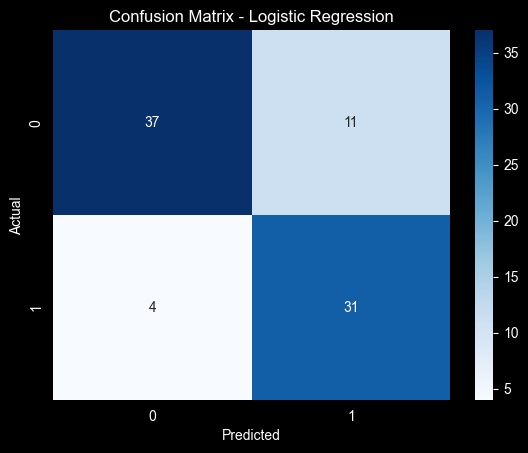

In [55]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Evaluation

The linear regression model provides a reasonable estimate of house prices, as indicated by the Mean Absolute Error. Logistic regression achieved a satisfactory accuracy, showing that model is able to distinguish between high and low-priced properties. Both models demonstrate how regression techniques can be applied to real-world data for prediction and classification task.

## Deployment

Deployment was not included in this assignment, as the focus was on understanding and evaluating regression models.